### RACIAL DEMOGRPAHICS EXPLORATION

#### This notebook focuses on the census data for California on racial demographics at the county level. The dataset is from Census Reporter. There will be two maps; the one will show the non-White racial group with the highest percentage in each county  and the 2nd will highlight spatial analysis based on ethnicity.

As usual I will use labs as a guide.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Loading data is my least favarite part as I always have a hard time loading data into jupyter.

In [2]:
cacounty_race = gpd.read_file('acs2019_5yr_B03002_05000US06083.geojson')

In [3]:
cacounty_race.shape

(59, 45)

In [4]:
cacounty_race.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,04000US06,California,39283497.0,0.0,23955809.0,0.0,14605312.0,3168.0,2169155.0,6936.0,...,1397.0,5381673.0,37257.0,733991.0,15040.0,363037.0,9443.0,370954.0,7871.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."
1,05000US06001,"Alameda County, CA",1656754.0,0.0,1285735.0,0.0,520447.0,487.0,171168.0,1541.0,...,181.0,173837.0,4242.0,32773.0,1822.0,16655.0,1275.0,16118.0,1291.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
2,05000US06003,"Alpine County, CA",1039.0,161.0,909.0,128.0,551.0,118.0,9.0,22.0,...,12.0,9.0,22.0,28.0,32.0,0.0,12.0,28.0,32.0,"MULTIPOLYGON (((-120.07333 38.70109, -120.0732..."
3,05000US06005,"Amador County, CA",38429.0,0.0,33089.0,0.0,30035.0,34.0,848.0,107.0,...,9.0,1490.0,340.0,412.0,167.0,106.0,70.0,306.0,159.0,"MULTIPOLYGON (((-121.02729 38.48136, -121.0272..."
4,05000US06007,"Butte County, CA",225817.0,0.0,188901.0,0.0,162537.0,240.0,3342.0,347.0,...,110.0,10433.0,1177.0,3302.0,642.0,1705.0,436.0,1597.0,415.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563..."


In [5]:
pd.set_option('display.max_rows', 500)
cacounty_race.head(500)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,04000US06,California,39283497.0,0.0,23955809.0,0.0,14605312.0,3168.0,2169155.0,6936.0,...,1397.0,5381673.0,37257.0,733991.0,15040.0,363037.0,9443.0,370954.0,7871.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."
1,05000US06001,"Alameda County, CA",1656754.0,0.0,1285735.0,0.0,520447.0,487.0,171168.0,1541.0,...,181.0,173837.0,4242.0,32773.0,1822.0,16655.0,1275.0,16118.0,1291.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
2,05000US06003,"Alpine County, CA",1039.0,161.0,909.0,128.0,551.0,118.0,9.0,22.0,...,12.0,9.0,22.0,28.0,32.0,0.0,12.0,28.0,32.0,"MULTIPOLYGON (((-120.07333 38.70109, -120.0732..."
3,05000US06005,"Amador County, CA",38429.0,0.0,33089.0,0.0,30035.0,34.0,848.0,107.0,...,9.0,1490.0,340.0,412.0,167.0,106.0,70.0,306.0,159.0,"MULTIPOLYGON (((-121.02729 38.48136, -121.0272..."
4,05000US06007,"Butte County, CA",225817.0,0.0,188901.0,0.0,162537.0,240.0,3342.0,347.0,...,110.0,10433.0,1177.0,3302.0,642.0,1705.0,436.0,1597.0,415.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563..."
5,05000US06009,"Calaveras County, CA",45514.0,0.0,40025.0,0.0,36837.0,99.0,315.0,157.0,...,26.0,553.0,272.0,431.0,248.0,62.0,68.0,369.0,237.0,"MULTIPOLYGON (((-120.63093 38.34110, -120.6305..."
6,05000US06011,"Colusa County, CA",21454.0,0.0,8716.0,0.0,7576.0,23.0,256.0,45.0,...,23.0,961.0,374.0,215.0,119.0,26.0,37.0,189.0,116.0,"MULTIPOLYGON (((-122.08018 39.41420, -122.0799..."
7,05000US06013,"Contra Costa County, CA",1142251.0,0.0,849953.0,0.0,500592.0,537.0,95892.0,1240.0,...,211.0,120972.0,4094.0,23956.0,1800.0,12811.0,1483.0,11145.0,1148.0,"MULTIPOLYGON (((-122.26764 37.90425, -122.2678..."
8,05000US06015,"Del Norte County, CA",27495.0,0.0,22066.0,0.0,17028.0,197.0,899.0,132.0,...,23.0,1144.0,279.0,622.0,282.0,374.0,240.0,248.0,129.0,"MULTIPOLYGON (((-124.31611 41.72839, -124.3306..."
9,05000US06017,"El Dorado County, CA",188563.0,0.0,164364.0,0.0,146747.0,230.0,1426.0,162.0,...,21.0,3697.0,730.0,1357.0,406.0,638.0,279.0,719.0,245.0,"MULTIPOLYGON (((-121.11866 38.71707, -121.1187..."


Since this is on the county level, I only have to delete the top row which gives the data for the whole state of California.

In [6]:
cacounty_race = cacounty_race.drop([0])

In [7]:
cacounty_race.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,05000US06001,"Alameda County, CA",1656754.0,0.0,1285735.0,0.0,520447.0,487.0,171168.0,1541.0,...,181.0,173837.0,4242.0,32773.0,1822.0,16655.0,1275.0,16118.0,1291.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
2,05000US06003,"Alpine County, CA",1039.0,161.0,909.0,128.0,551.0,118.0,9.0,22.0,...,12.0,9.0,22.0,28.0,32.0,0.0,12.0,28.0,32.0,"MULTIPOLYGON (((-120.07333 38.70109, -120.0732..."
3,05000US06005,"Amador County, CA",38429.0,0.0,33089.0,0.0,30035.0,34.0,848.0,107.0,...,9.0,1490.0,340.0,412.0,167.0,106.0,70.0,306.0,159.0,"MULTIPOLYGON (((-121.02729 38.48136, -121.0272..."
4,05000US06007,"Butte County, CA",225817.0,0.0,188901.0,0.0,162537.0,240.0,3342.0,347.0,...,110.0,10433.0,1177.0,3302.0,642.0,1705.0,436.0,1597.0,415.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563..."
5,05000US06009,"Calaveras County, CA",45514.0,0.0,40025.0,0.0,36837.0,99.0,315.0,157.0,...,26.0,553.0,272.0,431.0,248.0,62.0,68.0,369.0,237.0,"MULTIPOLYGON (((-120.63093 38.34110, -120.6305..."


Now I'm going to drop a bunch of columns. I'm also going to create a few new columns later as well.

In [8]:
list(cacounty_race)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [9]:
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',                  
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

Since I am going to do a spatial analysis in this notebook as well, I've decided to continue this sequence with a copy of my original cacounty_race dataset and name it cacounty_racev2.

In [10]:
cacounty_racev2 = cacounty_race[columns_to_keep]

In [11]:
cacounty_racev2.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,05000US06001,"Alameda County, CA",1656754.0,1285735.0,520447.0,171168.0,5210.0,496006.0,13277.0,5407.0,74220.0,371019.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
2,05000US06003,"Alpine County, CA",1039.0,909.0,551.0,9.0,314.0,10.0,0.0,0.0,25.0,130.0,"MULTIPOLYGON (((-120.07333 38.70109, -120.0732..."
3,05000US06005,"Amador County, CA",38429.0,33089.0,30035.0,848.0,249.0,477.0,52.0,10.0,1418.0,5340.0,"MULTIPOLYGON (((-121.02729 38.48136, -121.0272..."
4,05000US06007,"Butte County, CA",225817.0,188901.0,162537.0,3342.0,1699.0,10057.0,476.0,321.0,10469.0,36916.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563..."
5,05000US06009,"Calaveras County, CA",45514.0,40025.0,36837.0,315.0,184.0,684.0,19.0,55.0,1931.0,5489.0,"MULTIPOLYGON (((-120.63093 38.34110, -120.6305..."


In [12]:
list(cacounty_racev2)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [13]:
cacounty_racev2.columns = ['geoid',
 'County',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [14]:
# quick check before I continue
cacounty_racev2.head()

,geoid,County,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1,05000US06001,"Alameda County, CA",1656754.0,1285735.0,520447.0,171168.0,5210.0,496006.0,13277.0,5407.0,74220.0,371019.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
2,05000US06003,"Alpine County, CA",1039.0,909.0,551.0,9.0,314.0,10.0,0.0,0.0,25.0,130.0,"MULTIPOLYGON (((-120.07333 38.70109, -120.0732..."
3,05000US06005,"Amador County, CA",38429.0,33089.0,30035.0,848.0,249.0,477.0,52.0,10.0,1418.0,5340.0,"MULTIPOLYGON (((-121.02729 38.48136, -121.0272..."
4,05000US06007,"Butte County, CA",225817.0,188901.0,162537.0,3342.0,1699.0,10057.0,476.0,321.0,10469.0,36916.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563..."
5,05000US06009,"Calaveras County, CA",45514.0,40025.0,36837.0,315.0,184.0,684.0,19.0,55.0,1931.0,5489.0,"MULTIPOLYGON (((-120.63093 38.34110, -120.6305..."


Perfect.

Now, I am going to create those new columns I mentioned earlier. One new column will be named 'Non-White Not Hispanic or Latino'. To do this I will subtract data in the 'Non Hispanic White' column from the 'Non Hispanic' column. Afterwards,  I am going to convert the whole dataset's absolute numbers into percentages. Eventually, The goal is to  create maps that show the variance of non-white latinos vs latinos in each county across the state. 

In [15]:
# new 'Non-White Not Hispanic or Latino'
cacounty_racev2['Non-White Not Hispanic or Latino'] = cacounty_racev2['Non Hispanic']-cacounty_racev2['Non Hispanic White']

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [16]:
cacounty_racev2

,geoid,County,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Non-White Not Hispanic or Latino
1,05000US06001,"Alameda County, CA",1656754.0,1285735.0,520447.0,171168.0,5210.0,496006.0,13277.0,5407.0,74220.0,371019.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817...",765288.0
2,05000US06003,"Alpine County, CA",1039.0,909.0,551.0,9.0,314.0,10.0,0.0,0.0,25.0,130.0,"MULTIPOLYGON (((-120.07333 38.70109, -120.0732...",358.0
3,05000US06005,"Amador County, CA",38429.0,33089.0,30035.0,848.0,249.0,477.0,52.0,10.0,1418.0,5340.0,"MULTIPOLYGON (((-121.02729 38.48136, -121.0272...",3054.0
4,05000US06007,"Butte County, CA",225817.0,188901.0,162537.0,3342.0,1699.0,10057.0,476.0,321.0,10469.0,36916.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563...",26364.0
5,05000US06009,"Calaveras County, CA",45514.0,40025.0,36837.0,315.0,184.0,684.0,19.0,55.0,1931.0,5489.0,"MULTIPOLYGON (((-120.63093 38.34110, -120.6305...",3188.0
6,05000US06011,"Colusa County, CA",21454.0,8716.0,7576.0,256.0,143.0,273.0,38.0,36.0,394.0,12738.0,"MULTIPOLYGON (((-122.08018 39.41420, -122.0799...",1140.0
7,05000US06013,"Contra Costa County, CA",1142251.0,849953.0,500592.0,95892.0,2278.0,188237.0,5297.0,3657.0,54000.0,292298.0,"MULTIPOLYGON (((-122.26764 37.90425, -122.2678...",349361.0
8,05000US06015,"Del Norte County, CA",27495.0,22066.0,17028.0,899.0,1943.0,862.0,44.0,176.0,1114.0,5429.0,"MULTIPOLYGON (((-124.31611 41.72839, -124.3306...",5038.0
9,05000US06017,"El Dorado County, CA",188563.0,164364.0,146747.0,1426.0,1031.0,8487.0,472.0,295.0,5906.0,24199.0,"MULTIPOLYGON (((-121.11866 38.71707, -121.1187...",17617.0
10,05000US06019,"Fresno County, CA",984521.0,462157.0,289650.0,44209.0,4651.0,99480.0,1207.0,1732.0,21228.0,522364.0,"MULTIPOLYGON (((-120.42219 36.84014, -120.4217...",172507.0


Yes! Ok. Now to create percentages for all of the columns. The internet says that the red box is just a warning not an error so I'm going to ignore it.

In [17]:
cacounty_racev2['Percent Total'] = cacounty_racev2['Total']/cacounty_racev2['Total']*100
cacounty_racev2['Percent Non Hispanic'] = cacounty_racev2['Non Hispanic']/cacounty_racev2['Total']*100
cacounty_racev2['Percent Non Hispanic White'] = cacounty_racev2['Non Hispanic White']/cacounty_racev2['Total']*100
cacounty_racev2['Percent Non Hispanic Black'] = cacounty_racev2['Non Hispanic Black']/cacounty_racev2['Total']*100
cacounty_racev2['Percent Non Hispanic American Indian and Alaska Native'] = cacounty_racev2['Non Hispanic American Indian and Alaska Native']/cacounty_racev2['Total']*100
cacounty_racev2['Percent Non Hispanic Asian'] = cacounty_racev2['Non Hispanic Asian']/cacounty_racev2['Total']*100
cacounty_racev2['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = cacounty_racev2['Non Hispanic Native Hawaiian and Other Pacific Islander']/cacounty_racev2['Total']*100
cacounty_racev2['Percent Non Hispanic Some other race'] = cacounty_racev2['Non Hispanic Some other race']/cacounty_racev2['Total']*100
cacounty_racev2['Percent Non Hispanic Two or more races'] = cacounty_racev2['Non Hispanic Two or more races']/cacounty_racev2['Total']*100
cacounty_racev2['Percent Hispanic'] = cacounty_racev2['Hispanic']/cacounty_racev2['Total']*100
cacounty_racev2['Percent Non-White Not Hispanic or Latino'] = cacounty_racev2['Non-White Not Hispanic or Latino']/cacounty_racev2['Total']*100

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [18]:
# check it
cacounty_racev2.head()

,geoid,County,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic,Percent Non-White Not Hispanic or Latino
1,05000US06001,"Alameda County, CA",1656754.0,1285735.0,520447.0,171168.0,5210.0,496006.0,13277.0,5407.0,...,77.605667,31.413656,10.331528,0.314470,29.938422,0.801386,0.326361,4.479844,22.394333,46.192012
2,05000US06003,"Alpine County, CA",1039.0,909.0,551.0,9.0,314.0,10.0,0.0,0.0,...,87.487969,53.031761,0.866218,30.221367,0.962464,0.000000,0.000000,2.406160,12.512031,34.456208
3,05000US06005,"Amador County, CA",38429.0,33089.0,30035.0,848.0,249.0,477.0,52.0,10.0,...,86.104244,78.157121,2.206667,0.647948,1.241250,0.135314,0.026022,3.689922,13.895756,7.947123
4,05000US06007,"Butte County, CA",225817.0,188901.0,162537.0,3342.0,1699.0,10057.0,476.0,321.0,...,83.652249,71.977309,1.479959,0.752379,4.453606,0.210790,0.142151,4.636055,16.347751,11.674940
5,05000US06009,"Calaveras County, CA",45514.0,40025.0,36837.0,315.0,184.0,684.0,19.0,55.0,...,87.939975,80.935536,0.692095,0.404271,1.502834,0.041745,0.120842,4.242651,12.060025,7.004438


In [19]:
pd.set_option('display.max_rows', 500)
cacounty_racev2.head(500)

,geoid,County,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races,Percent Hispanic,Percent Non-White Not Hispanic or Latino
1,05000US06001,"Alameda County, CA",1656754.0,1285735.0,520447.0,171168.0,5210.0,496006.0,13277.0,5407.0,...,77.605667,31.413656,10.331528,0.314470,29.938422,0.801386,0.326361,4.479844,22.394333,46.192012
2,05000US06003,"Alpine County, CA",1039.0,909.0,551.0,9.0,314.0,10.0,0.0,0.0,...,87.487969,53.031761,0.866218,30.221367,0.962464,0.000000,0.000000,2.406160,12.512031,34.456208
3,05000US06005,"Amador County, CA",38429.0,33089.0,30035.0,848.0,249.0,477.0,52.0,10.0,...,86.104244,78.157121,2.206667,0.647948,1.241250,0.135314,0.026022,3.689922,13.895756,7.947123
4,05000US06007,"Butte County, CA",225817.0,188901.0,162537.0,3342.0,1699.0,10057.0,476.0,321.0,...,83.652249,71.977309,1.479959,0.752379,4.453606,0.210790,0.142151,4.636055,16.347751,11.674940
5,05000US06009,"Calaveras County, CA",45514.0,40025.0,36837.0,315.0,184.0,684.0,19.0,55.0,...,87.939975,80.935536,0.692095,0.404271,1.502834,0.041745,0.120842,4.242651,12.060025,7.004438
6,05000US06011,"Colusa County, CA",21454.0,8716.0,7576.0,256.0,143.0,273.0,38.0,36.0,...,40.626457,35.312762,1.193251,0.666542,1.272490,0.177123,0.167801,1.836487,59.373543,5.313694
7,05000US06013,"Contra Costa County, CA",1142251.0,849953.0,500592.0,95892.0,2278.0,188237.0,5297.0,3657.0,...,74.410353,43.825044,8.395002,0.199431,16.479478,0.463733,0.320157,4.727507,25.589647,30.585309
8,05000US06015,"Del Norte County, CA",27495.0,22066.0,17028.0,899.0,1943.0,862.0,44.0,176.0,...,80.254592,61.931260,3.269685,7.066739,3.135115,0.160029,0.640116,4.051646,19.745408,18.323332
9,05000US06017,"El Dorado County, CA",188563.0,164364.0,146747.0,1426.0,1031.0,8487.0,472.0,295.0,...,87.166623,77.823857,0.756246,0.546767,4.500883,0.250314,0.156446,3.132110,12.833377,9.342766
10,05000US06019,"Fresno County, CA",984521.0,462157.0,289650.0,44209.0,4651.0,99480.0,1207.0,1732.0,...,46.942320,29.420398,4.490407,0.472412,10.104406,0.122598,0.175923,2.156175,53.057680,17.521922


## Percentage of Latinos in Each County in the State of California

Text(0.5, 1.0, 'Percentage of Latinos in Each County in the State of California')

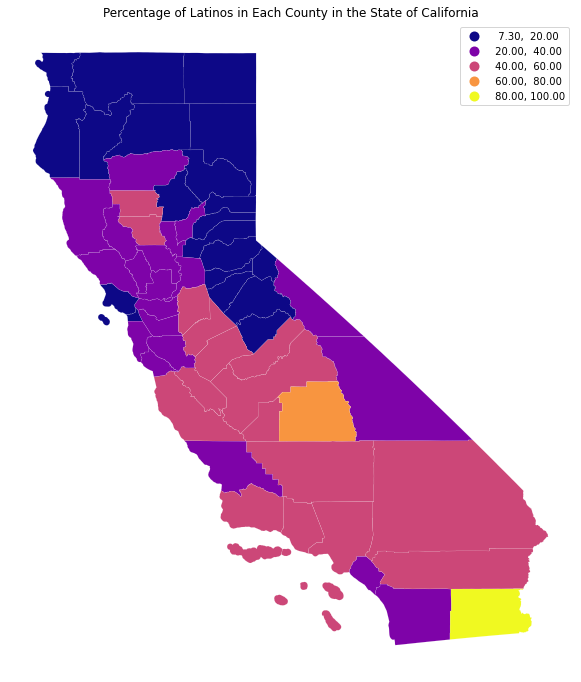

In [20]:
fig, ax=plt.subplots(figsize=(12,12))

cacounty_racev2.plot(ax=ax,            
         column='Percent Hispanic',
         cmap='plasma',
         legend=True,
         scheme='user_defined',
         classification_kwds={'bins':[20,40,60,80,100]},
         edgecolor='white',
         linewidth=0.1
        )

ax.axis('off')
plt.title('Percentage of Latinos in Each County in the State of California')

Text(0.5, 1.0, 'Percentage of Latinos in Each County in the State of California')

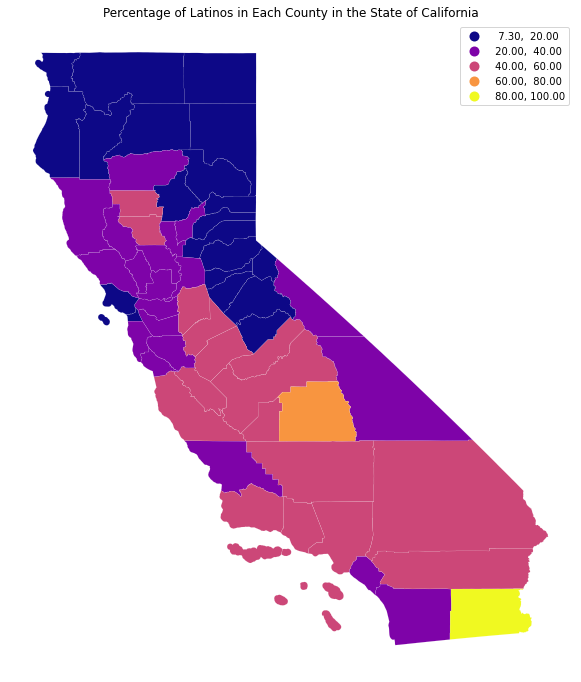

In [20]:
#copy
fig, ax=plt.subplots(figsize=(12,12))

cacounty_racev2.plot(ax=ax,            
         column='Percent Hispanic',
         cmap='plasma',
         legend=True,
         scheme='user_defined',
         classification_kwds={'bins':[20,40,60,80,100]},
         edgecolor='white',
         linewidth=0.1
        )



ax.axis('off')
plt.title('Percentage of Latinos in Each County in the State of California')

## Percentage of Non Latinos (including whites) in Each County in the State of California

Text(0.5, 1.0, 'Percentage of All Non Latinos in Each County in the State of California')

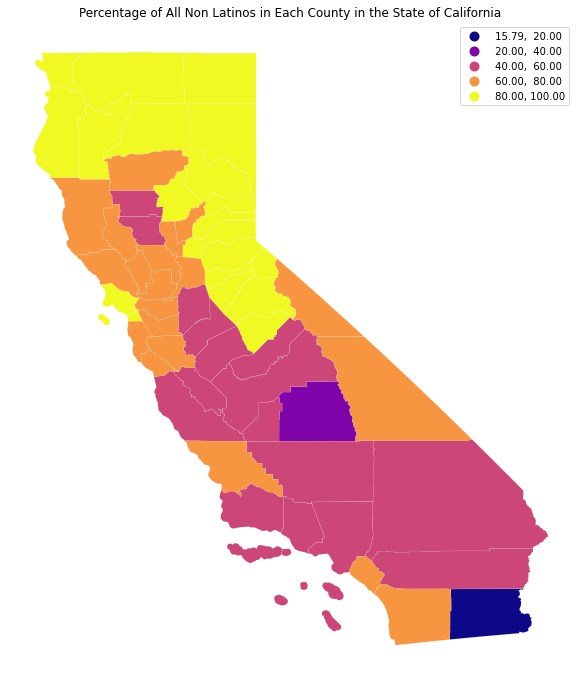

In [21]:
fig, ax=plt.subplots(figsize=(12,12))

cacounty_racev2.plot(ax=ax,
         column='Percent Non Hispanic',
         cmap='plasma',
         legend=True,
         scheme='user_defined',
         classification_kwds={'bins':[20,40,60,80,100]},
         edgecolor='white',
         linewidth=0.1
        )

ax.axis('off')
plt.title('Percentage of All Non Latinos in Each County in the State of California')

## Percentage of White Population in Each County in the State of California

Text(0.5, 1.0, 'Percentage of White Population in Each County in the State of California')

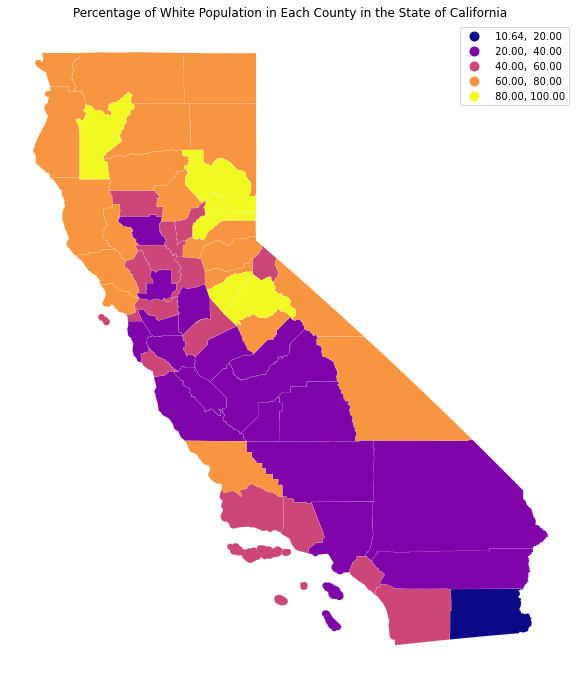

In [22]:
fig, ax=plt.subplots(figsize=(12,12))

cacounty_racev2.plot(ax=ax,
         column='Percent Non Hispanic White',
         cmap='plasma',
         legend=True,
         scheme='user_defined',
         classification_kwds={'bins':[20,40,60,80,100]},
         edgecolor='white',
         linewidth=0.1
        )

ax.axis('off')
plt.title('Percentage of White Population in Each County in the State of California')

### SPATIAL ANALYSIS

In [23]:
import esda
from esda.moran import Moran, Moran_Local

In [24]:
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_moran_simulation

In [25]:
import libpysal as lps

In [26]:
import plotly.express as px

In [27]:
# get the layers into a web mercator projection
# reproject to web mercator
cacounty_racev2 = cacounty_racev2.to_crs(epsg=3857)

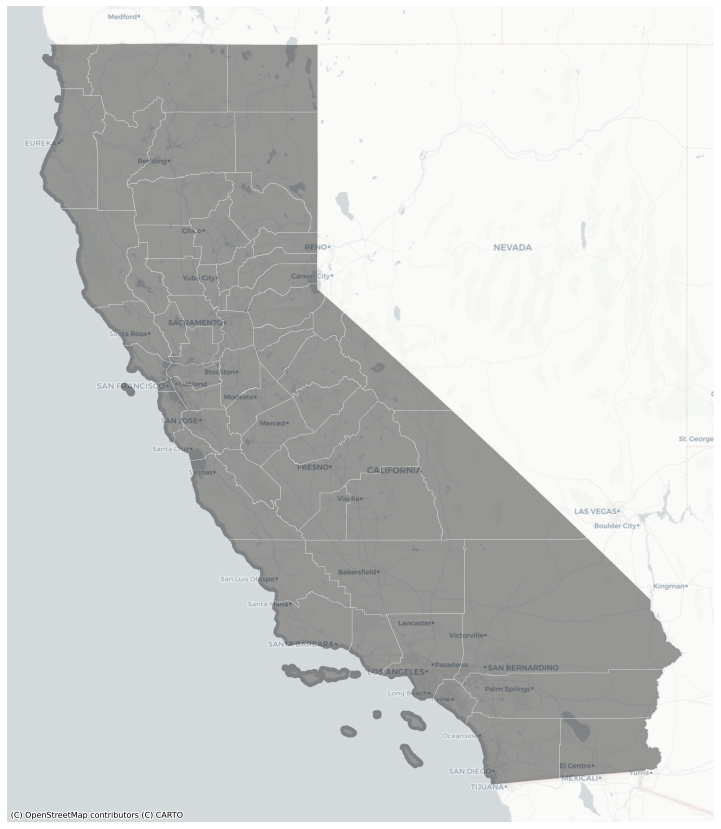

In [28]:
# plotting the census tracts
fig, ax = plt.subplots(figsize=(15,15))

cacounty_racev2.plot(ax=ax,
                     color='black',
                     edgecolor='white',
                     lw=0.5,
                     alpha=0.4)

# removing axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [29]:
# wildfire data
df = pd.read_csv('California_Fire_Incidents.csv')

In [31]:
# just as I've done before, I'm converting it into a geodataframe
CA_Fires = gpd.GeoDataFrame(df,
                            crs='EPSG:4326',
                            geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [32]:
CA_Fires = CA_Fires.to_crs(epsg=3857)

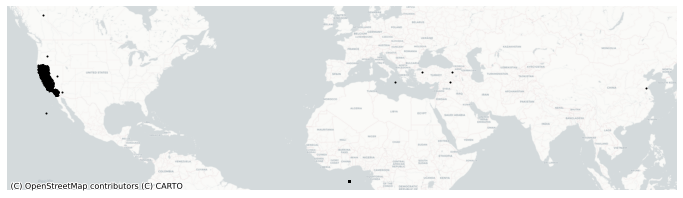

In [39]:
# a map!
fig, ax = plt.subplots(figsize=(12,12))

CA_Fires.plot(ax=ax,
              color='black',
              markersize=1)
              
# drop the axis
ax.axis('off')
              
# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

This is where I think I have to go in drop a bunch of those rows and values. Just as in another notebook, I'll be dropping duplicates, wildfires that aren't in california and wildfires with geometry points as 0,0.

In [40]:
CA_Fires = CA_Fires.drop([1423])
CA_Fires = CA_Fires.drop([1424])
CA_Fires = CA_Fires.drop([1421])
CA_Fires = CA_Fires.drop([1590])
CA_Fires = CA_Fires.drop([113])
CA_Fires = CA_Fires.drop([165])
CA_Fires = CA_Fires.drop([627])

CPLE_AppDefinedError: PROJ: push: Invalid latitude

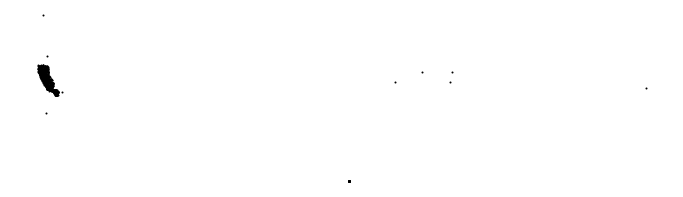

In [42]:
# a map!
fig, ax = plt.subplots(figsize=(12,12))

CA_Fires.plot(ax=ax,
              color='black',
              markersize=1)
              
# drop the axis
ax.axis('off')
              
# add a basemap
ctx.add_basemap(ax,crs='epsg:4324',source=ctx.providers.CartoDB.Positron)

In [43]:
# I ~think~ this will weed it out
CA_Fires = CA_Fires[CA_Fires.geometry!=0]

One more time.

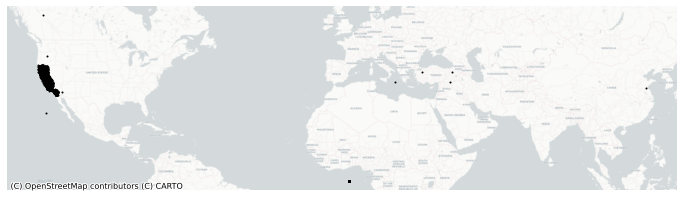

In [44]:
fig, ax = plt.subplots(figsize=(12,12))

CA_Fires.plot(ax=ax,
              color='black',
              markersize=1)
              
# drop the axis
ax.axis('off')
              
# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Or not.

In [46]:
CA_Fires = CA_Fires[CA_Fires.Longitude!=0]

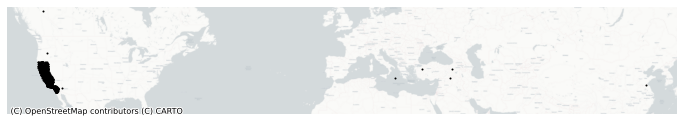

In [47]:
fig, ax = plt.subplots(figsize=(12,12))

CA_Fires.plot(ax=ax,
              color='black',
              markersize=1)
              
# drop the axis
ax.axis('off')
              
# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

I can't make that 'heat map' work....

Going another route....

In [49]:
CA_Fires.drop_duplicates(subset=['Name'])

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,geometry
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN,POINT (-13367912.371 4559244.358)
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN,POINT (-13182807.650 4107706.796)
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN,POINT (-12994196.143 3989861.355)
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN,POINT (-13430696.564 4738875.148)
5,22992.0,False,Sierra National Forest,NaN,2013,False,/incidents/2013/7/22/aspen-fire/,NaN,NaN,Fresno,...,2013-07-22T22:15:00Z,Finalized,NaN,NaN,NaN,NaN,bee8c339-4f26-4b78-a5b4-a8a0ebdb8786,2013-09-24T20:15:00Z,NaN,POINT (-13282419.002 4478067.468)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,10.0,False,CAL FIRE Butte County Fire Department,NaN,2019,True,/incidents/2019/7/23/moms-fire/,NaN,NaN,Butte,...,2019-07-23T14:41:00Z,Finalized,NaN,NaN,NaN,NaN,7955a367-99da-4047-9f69-cc60ad3208e6,2019-07-25T18:59:59.017Z,NaN,POINT (-13534194.525 4782565.134)
1629,10.0,False,CAL FIRE Siskiyou Unit,NaN,2019,True,/incidents/2019/6/16/irongate-fire/,NaN,NaN,Siskiyou,...,2019-06-16T20:33:00Z,Finalized,NaN,NaN,NaN,NaN,fe63d965-9069-4a96-b9da-99d5fefdaa19,2019-07-03T13:12:42.677Z,NaN,POINT (-13625680.445 5152926.862)
1630,10.0,False,CAL FIRE / Butte County Fire,NaN,2019,True,/incidents/2019/4/30/cana-fire/,NaN,NaN,Butte,...,2019-04-30T12:20:00Z,Finalized,NaN,NaN,NaN,NaN,34abbc65-5bbe-474b-85c8-16d07bb5b503,2019-05-08T08:47:00Z,NaN,POINT (-13576191.139 4842657.793)
1633,NaN,False,Yolo County Fire Protection District,NaN,2019,False,/incidents/2019/11/25/cashe-fire/,NaN,NaN,Yolo,...,2019-11-25T12:02:02Z,Finalized,NaN,NaN,NaN,NaN,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03T16:35:20.93Z,NaN,POINT (-13550887.217 4683731.138)


In [50]:
CA_Fires.shape

(1475, 41)

In [52]:
CA_Fires.drop_duplicates(subset='geometry', keep=False)
CA_Fires.drop_duplicates(subset='geometry', keep=False, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [53]:
CA_Fires.shape

(1408, 41)

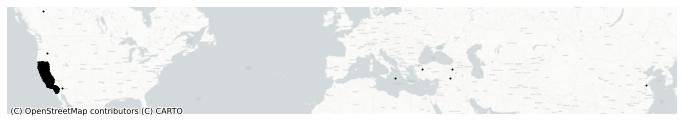

In [54]:
fig, ax = plt.subplots(figsize=(12,12))

CA_Fires.plot(ax=ax,
              color='black',
              markersize=1)
              
# drop the axis
ax.axis('off')
              
# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

I have no clue why it isn't working.

This final map is of my racial demograhics with a wildfires overlay. Will it work?

/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


Text(0.5, 1.0, 'Percentage of Latinos in Each County in the State of California and California Wildfires 2013 to 2020')

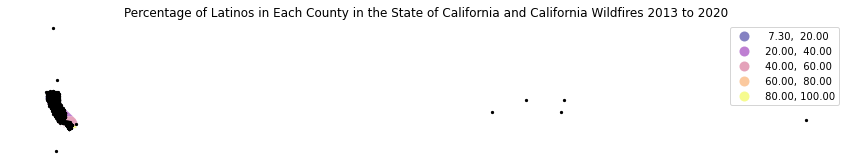

In [55]:
fig, ax = plt.subplots(figsize=(15,15))

cacounty_racev2.plot(ax=ax,            
         column='Percent Hispanic',
         cmap='plasma',
         legend=True,
         scheme='user_defined',
         alpha=0.5,
         classification_kwds={'bins':[20,40,60,80,100]},
         edgecolor='white',
         linewidth=0.1
        )

CA_Fires.plot(ax=ax,
              column='Name',
              color='black',
              markersize=5)

ax.axis('off')
plt.title('Percentage of Latinos in Each County in the State of California and California Wildfires 2013 to 2020')